<a href="https://colab.research.google.com/github/kafkapple/autoplot/blob/master/for_hochan_distance_duration_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#from scipy.spatial import distance

# Objective
# 1. Calcuclate two major metric
#: 1.1. distance moved (->velocity, direction, ...) / 1.2. time duration 

# 2. Calculate the metric within specific area / zone depending on the timebin 

In [ ]:

#Data 
df=pd.read_csv('./raw/H22.csv', header=None) # 9 body points xyz coordinate data
n_frame = df.shape[0] # total no. of frame
#5분간 recording 진행: 총 약 9000 frame (fps: 30)

# info
bodypoints='nose_x, nose_y, nose_z, head_x, head_ y, head_z, anus_x, anus_y, anus_z, bodycenter_x, bodycenter_y, bodycenter_z, right foot_x, right foot_y, right foot_z, left foot_x, left foot_y, left foot_z, right hand_x, right hand_y, right hand_z, left hand_x, left hand_y, left hand_z, tailtip_x, tailtip_y, tailtip_z'
BP=bodypoints.split(', ')
df.columns=BP # body points label

# parameter
timebin = 60 # sec
fps = 30
f_per_bin = timebin*fps # total frame per timebin
n_bin=n_frame//f_per_bin # ignore the timebin having missing data

#xaxis = -10 ~ 10 (총 20cm)
#yasxis= -10 ~ 10 (총 20cm)
#zaxis= -1~15.6 (총 16.6cm) 

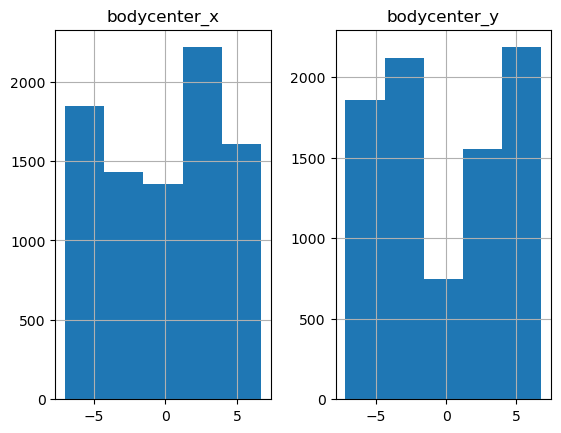

In [ ]:
# select target body point to focus: e.g., bodycenter
df_x= df.columns[df.columns.str.contains('x')] # x coordinate label
target_point = ['bodycenter_x', 'bodycenter_y'] # x, y only (to be simplified)
df_target=df.loc[:,target_point]

# visualize the data to check the distribution
hist = df_target.hist(bins=5)

In [ ]:
# zone: select ROI (region of interest)
#zone_x=[-2,2] # x -2 ~ 2
#zone_y=[-2,2] # y -2 ~ 2
#zone_z

###  query idx when x,y coordinate in zone (ignore z. )
#### x:target_point[0]  # -2<x<2
#### y:target_point[1]  # -2<y<2

df_zone =df_target.query('{}>{} and {}<{} and {}>{} and {}<{}'.format(target_point[0],zone_x[0],target_point[0],zone_x[1],target_point[1],zone_y[0],target_point[1],zone_y[1]))

In [ ]:
# e.g., 0<= idx < (0+1)*60*30 =1800
# 1800 <= idx < 2*60*30=3600 ...

# per timebin
print('Total no of frame: {}\nFPS: {}\nTotal time: {} sec\nTimebin: {} sec\nTarget body point: {}\n'.format(n_frame,fps, round(n_frame/fps,3), timebin,target_point))
for i in range(n_bin):
    # Total
   # print('Timebin {}: {} sec '.format(i+1, round(i_sec_total,3)))
    print('-Timebin {}'.format(i+1))
    i_df=df_target.query('index >{} and index <{} '.format(i*f_per_bin, (i+1)*f_per_bin))
    #i_dist_total=distance.pdist(i_df.values, metric='euclidean') 
    i_dist_total=np.sum(np.sqrt(i_df.diff().pow(2).sum(axis=1)))
    print('Distance moved in area: {} cm (calibration needed)'.format(round(i_dist_total,3)))
    print('Duration in arena: {} sec'.format(round(i_df.shape[0]/fps,3)))
    # Zone
    i_df_zone=df_zone.query('index >{} and index <{} '.format(i*f_per_bin, (i+1)*f_per_bin))
    i_no_frame=i_df_zone.shape[0] # total no. of frame per ith timebin when subject is in the zone
    i_sec=i_no_frame/fps # total sec per ith timebin
    print('Duration in zone: {} sec\n'.format(round(i_sec,3)))

Total no of frame: 8452
FPS: 30
Total time: 281.733 sec
Timebin: 60 sec
Target body point: ['bodycenter_x', 'bodycenter_y']

-Timebin 1
Distance moved in area: 224.881 cm (calibration needed)
Duration in arena: 59.967 sec
Duration in zone: 2.867 sec

-Timebin 2
Distance moved in area: 174.731 cm (calibration needed)
Duration in arena: 59.967 sec
Duration in zone: 1.267 sec

-Timebin 3
Distance moved in area: 134.496 cm (calibration needed)
Duration in arena: 59.967 sec
Duration in zone: 0.6 sec

-Timebin 4
Distance moved in area: 111.464 cm (calibration needed)
Duration in arena: 59.967 sec
Duration in zone: 12.533 sec



,bodycenter_x,bodycenter_y
5401,-5.9895,0.20421
5402,-6.0132,0.52632
5403,-6.0789,0.93284
5404,-6.1818,1.36000
5405,-6.3215,1.78460
...,...,...
7195,5.1133,4.70390
7196,5.1001,4.69810
7197,5.0797,4.68970
7198,5.0544,4.68280


In [ ]:

"""
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(i_df.values, i_df.values)
series1 = pd.Series(range(10))
series2 = pd.Series(range(100,110))
distance = np.linalg.norm(series1-series2)
df_z = df_zone.reset_index(level=0)
"""